In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# Reading in the data
diabetes_data = pd.read_csv("C:/datasets/diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.shape

(768, 9)

In [4]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [5]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
# factors influencing the outcome...BMI,insulin, Glucose level, and pregnancies all directly influenced the outcome
# BMI directly measures unhealthy fat(Obesity), elevated blood glucose level is a prominent characteristic of diabetes
# pregnancies account for a special type of diabetes(Gestational diabetes)...it's temporary 

diabetes_data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


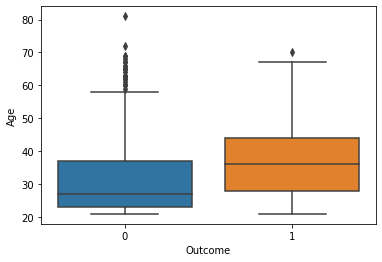

In [8]:
# VISUALIZATIONS...showing the relationship between Age and Disease outcome
sns.boxplot(x= "Outcome", y= "Age", data = diabetes_data);

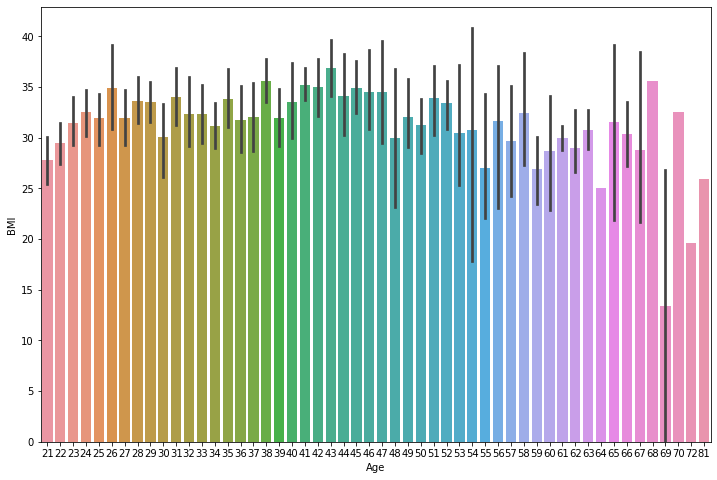

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x= "Age", y= "BMI", data = diabetes_data);

In [10]:
# Training the datasets

X = diabetes_data.drop("Outcome", axis=1)
Y = diabetes_data["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Predicting using differnt models

def models(X_train,Y_train):
    #Decision Tree
    Decision_tree = DecisionTreeClassifier(criterion = "entropy")
    Decision_tree.fit(X_train, Y_train)
    
    #Logistic Regression
    log_regression = LogisticRegression()
    log_regression.fit(X_train, Y_train)
    
    #Random forest classifier
    rand_forest = RandomForestClassifier()
    rand_forest.fit(X_train, Y_train)
    
    #SVM
    svm_classifier = svm.SVC(kernel="linear")
    svm_classifier.fit(X_train, Y_train)
    
    print("[0]Decision Tree training accuracy : ", Decision_tree.score(X_train, Y_train))
    print("[1]Logistic Regression training accuracy : ", log_regression.score(X_train, Y_train))
    print("[2]Random forest classifier training accuracy : ", rand_forest.score(X_train, Y_train))
    print("[3]SVM classifier training accuracy : ", svm_classifier.score(X_train, Y_train))
    
    return Decision_tree, log_regression, rand_forest, svm_classifier

In [12]:
model = models(X_train, Y_train)

[0]Decision Tree training accuracy :  1.0
[1]Logistic Regression training accuracy :  0.7638888888888888
[2]Random forest classifier training accuracy :  1.0
[3]SVM classifier training accuracy :  0.7638888888888888


In [13]:
# Checking accuracy of model on test data
from sklearn import metrics
def accuracy_score():
    print("Accuracy score for each model are; ")
    print(" Decision Tree : ", metrics.accuracy_score(Y_test, model[0].predict(X_test)))
    print(" Logistic Regression : ", metrics.accuracy_score(Y_test, model[1].predict(X_test)))
    print(" Random forest classifier : ", metrics.accuracy_score(Y_test, model[2].predict(X_test)))
    print(" SVM classifier : ", metrics.accuracy_score(Y_test, model[3].predict(X_test)))
accuracy_score()

Accuracy score for each model are; 
 Decision Tree :  0.7395833333333334
 Logistic Regression :  0.796875
 Random forest classifier :  0.7864583333333334
 SVM classifier :  0.8072916666666666


In [14]:
def F1_score():
    print("F1 score for each model are; ")
    print(" Decision Tree : ", metrics.f1_score(Y_test, model[0].predict(X_test)))
    print(" Logistic Regression : ", metrics.f1_score(Y_test, model[1].predict(X_test)))
    print(" Random forest classifier : ", metrics.f1_score(Y_test, model[2].predict(X_test)))
    print(" SVM classifier : ", metrics.f1_score(Y_test, model[3].predict(X_test)))
F1_score()

F1 score for each model are; 
 Decision Tree :  0.626865671641791
 Logistic Regression :  0.6486486486486487
 Random forest classifier :  0.6371681415929203
 SVM classifier :  0.672566371681416


In [23]:
#confusion matrix for the best model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, model[3].predict(X_test))
confusion_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [19]:
#predict using the logistic regression model and compare with the actual values
prediction = model[3].predict(X_test)
print(prediction)
print("  ")
print(np.array(Y_test))


[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]
  
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [22]:
# model evaluation table 
algor = ["Decision Tree", "Logistic regression", "Random forest classifier", "SVM Classifier"]
accuracy_score = [metrics.accuracy_score(Y_test, model[0].predict(X_test)), metrics.accuracy_score(Y_test, model[1].predict(X_test)), metrics.accuracy_score(Y_test, model[2].predict(X_test)),  metrics.accuracy_score(Y_test, model[3].predict(X_test))]
F1_score = [metrics.f1_score(Y_test, model[0].predict(X_test)), metrics.f1_score(Y_test, model[1].predict(X_test)), metrics.f1_score(Y_test, model[2].predict(X_test)), metrics.f1_score(Y_test, model[3].predict(X_test))]
Model_evaluation = pd.DataFrame({"MODEL": algor, "ACCURACY SCORE" : accuracy_score, "F1 SCORE" : F1_score})
Model_evaluation

,MODEL,ACCURACY SCORE,F1 SCORE
0,Decision Tree,0.739583,0.626866
1,Logistic regression,0.796875,0.648649
2,Random forest classifier,0.786458,0.637168
3,SVM Classifier,0.807292,0.672566
